# Youtube Stats

**A data analysis project**
a step by step guide

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessi

/kaggle/input/youtube/youtube.csv


# **To display the dataframes**

In [2]:
from IPython.display import display

**Step 2: Load Your Data**
and lets get little sense of data

In [3]:
data_path = '/kaggle/input/youtube/youtube.csv'
data = pd.read_csv(data_path, encoding='ISO-8859-1')
print("Initial Data:")
display(data.head())

Initial Data:


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


As we can see from data there **NaN** values.
<br>Lets explore around to see what kind of data we are interacting with.

In [4]:
data.head(10)  # first 10 rows
data.tail(10)  # last 10 rows


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN
986,987,ANNA KOVA,12400000,1.395959e+10,People & Blogs,annakova,1,NaN,NaN,Film,...,NaN,2006.0,Jun,18.0,NaN,NaN,NaN,NaN,NaN,NaN
987,988,Avril Lavigne,12400000,6.202090e+09,Music,Avril Lavigne,205,United States,US,Music,...,NaN,2005.0,Oct,8.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
988,989,Caylus,12400000,4.779140e+09,Education,Caylus,1340,United States,US,Games,...,400000.0,2016.0,Apr,6.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


**Summary Statistics:**

Get a quick statistical summary of the numeric columns.

In [5]:
data.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


**Data Types and Non-null Counts:**

Check the data types of each column and see how many non-null values exist.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

**Unique Values:**

Find out how many unique values each column has. This is especially useful for categorical columns.

In [7]:
data['Youtuber'].nunique()

995

**See how often each value appears in a column:**
<br>Replace 'category' with 'column_name'like 'Country' to see value count

In [8]:
data['category'].value_counts()

Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: category, dtype: int64

**Checking for Missing Values:**
<br>Get a summary of missing values in each column.

In [9]:
print("\nsummary of missing values in each column")
data.isnull().sum()


summary of missing values in each column


rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


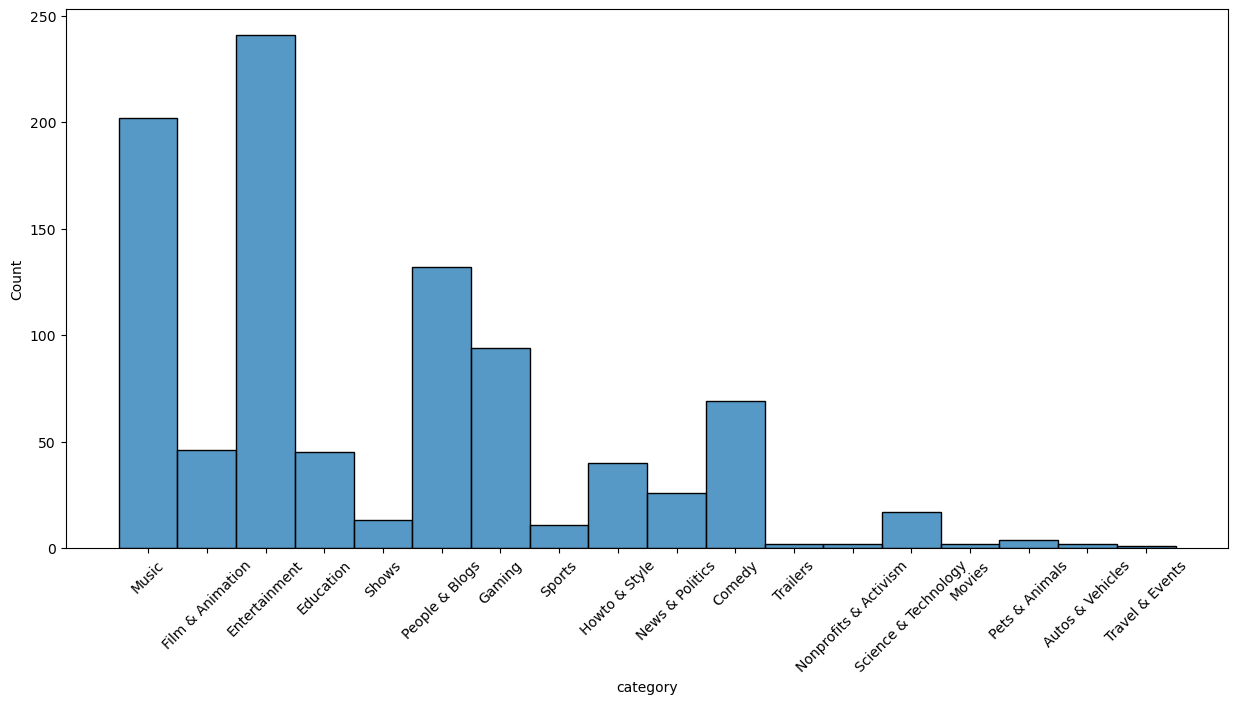

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 7))
sns.histplot(data['category'])
plt.xticks(rotation=45)
plt.show()


Now we got a good sense of what kind of data we have. Let's start with data cleaning.
# Data Cleaning Steps:
**Step 1: Drop Rows Based on Specific NaN Columns:** 
<br> We will drop rows with NaN values in columns where missing values can't be inferred from other data. 
<br>These columns include category, channel_type, video_views_rank, created_year, created_month, created_date.

In [11]:
# Step 1: Drop Rows Based on Specific NaN Columns
cols_to_check = ['category', 'channel_type', 'video_views_rank', 'created_year', 'created_month', 'created_date']
data = data.dropna(subset=cols_to_check)
#data.info()

**Step 2: Fill NaN Values in Subscribers for Last 30 Days with 0:**
<br> Since NaN values in this column can be treated as no change in subscribers.

In [12]:
data['subscribers_for_last_30_days'].fillna(0, inplace=True)


**Step 3: Handle Country-related NaNs:**
<br> For Country, Abbreviation, Latitude, Longitude, and other country-related fields with NaN values, label them as 'Unknown' as they can't be inferred accurately.

In [13]:
# Step 4: Handle Country-related NaNs
country_related_columns = ['Country', 'Abbreviation', 'Latitude', 'Longitude', 'Gross tertiary education enrollment (%)', 
                           'Population', 'Unemployment rate', 'Urban_population']
for col in country_related_columns:
    data[col].fillna('Unknown', inplace=True)

**Let's display the cleaned data**

In [14]:
# # Display the cleaned data
print(data.head())
print(data.info())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

# Data Cleaning - Further Refinement
**Handling the Columns with Residual NaN values:**

* For **country_rank and channel_type_rank**, we can assign a placeholder value (e.g., -1) to denote that the rank is not available.
* For **video_views_for_the_last_30_days**, we can fill NaN values with the median of that column since it might provide a better central tendency than the mean for skewed data.

In [15]:
# Handling the Columns with Residual NaN values

# Replace NaN values in 'country_rank' and 'channel_type_rank' with -1
data[['country_rank', 'channel_type_rank']] = data[['country_rank', 'channel_type_rank']].fillna(-1)

# Replace NaN values in 'video_views_for_the_last_30_days' with its median
median_views = data['video_views_for_the_last_30_days'].median()
data['video_views_for_the_last_30_days'].fillna(median_views, inplace=True)

**Data Type Conversions:**

* Convert the columns **Gross tertiary education enrollment (%)**, **Population**,**Unemployment rate**, **Urban_population**, **Latitude**, and **Longitude** to their appropriate data types.

In [16]:
# Data Type Conversions
numeric_cols = ['Gross tertiary education enrollment (%)', 'Population', 
                'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']

# Convert columns to their correct data types
for col in numeric_cols:
    # First, we handle any non-numeric strings like 'Unknown' which we added during cleaning
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
# Check the updated data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     920 non-null    int64  
 1   Youtuber                                 920 non-null    object 
 2   subscribers                              920 non-null    int64  
 3   video views                              920 non-null    float64
 4   category                                 920 non-null    object 
 5   Title                                    920 non-null    object 
 6   uploads                                  920 non-null    int64  
 7   Country                                  920 non-null    object 
 8   Abbreviation                             920 non-null    object 
 9   channel_type                             920 non-null    object 
 10  video_views_rank                         920 non-n

In [17]:
#print(data.info())

Before moving into next step of Exploratory Data Analysis. Lets understand what other factors might be useful to gain better insights.

**Engagement Ratio:**
This feature can help in understanding how engaging the content is for the subscribers. A higher ratio might imply that the content is highly engaging and is being watched multiple times or by a broader audience than just the subscribers.

**Earnings Ratio:**
This feature can provide insights into the variability of a Youtuber's earnings. A value close to 1 would imply stable earnings, whereas a larger value indicates variability.

In [18]:
data['engagement_ratio'] = data['video views'] / data['subscribers']
data['earnings_ratio'] = data['highest_monthly_earnings'] / data['lowest_monthly_earnings']

# Sort data by subscribers and select top 10
top_youtubers = data.sort_values(by='subscribers', ascending=False).head(10)
top_youtubers_VR = data.sort_values(by='video_views_rank', ascending=True).head(10)

print(top_youtubers[['Youtuber', 'engagement_ratio']])
print(top_youtubers[['Youtuber', 'earnings_ratio']])
print(top_youtubers_VR[['Youtuber', 'video_views_rank']])


                      Youtuber  engagement_ratio
0                     T-Series        930.612245
1               YouTube Movies          0.000000
2                      MrBeast        170.896638
3   Cocomelon - Nursery Rhymes       1012.345679
4                    SET India        930.817610
6          ýýý Kids Diana Show        832.562862
7                    PewDiePie        261.784184
8                  Like Nastya        853.576038
9                Vlad and Niki        780.385944
10           Zee Music Company        598.307026
                      Youtuber  earnings_ratio
0                     T-Series       15.940489
1               YouTube Movies             inf
2                      MrBeast       16.023739
3   Cocomelon - Nursery Rhymes       15.998380
4                    SET India       16.012283
6          ýýý Kids Diana Show       15.855659
7                    PewDiePie       15.989796
8                  Like Nastya       16.049180
9                Vlad and Niki       1

* The earnings_ratio values for most of the YouTubers are quite close to each other. 
* Also, note that for 'YouTube Movies', the value is o, which can distort the plot scale.
* Rank '6' is missing in video_views_rank.Always check for these anomalies.(In this case original dataset loaded did not contain a channel with that specific rank to begin with)

In [19]:
# Replace 0 with an appropriate value or remove that data point
import numpy as np
top_youtubers['earnings_ratio'].replace(np.inf, np.nan, inplace=True)
top_youtubers.dropna(subset=['earnings_ratio'], inplace=True)

# Exploratory Data Analysis (EDA)
**1. Visualize Distributions:**
<br>Use histograms, boxplots, and density plots to understand the distribution of the data.

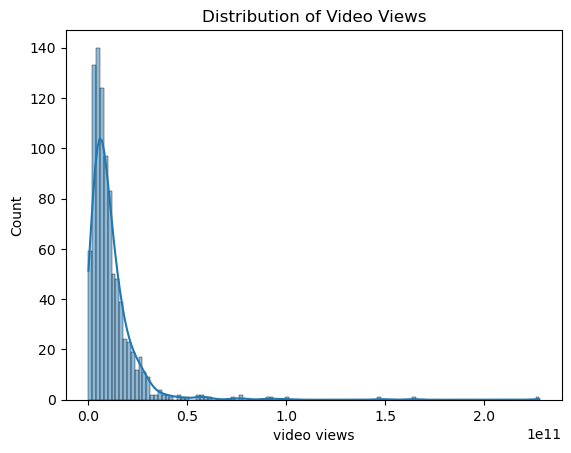

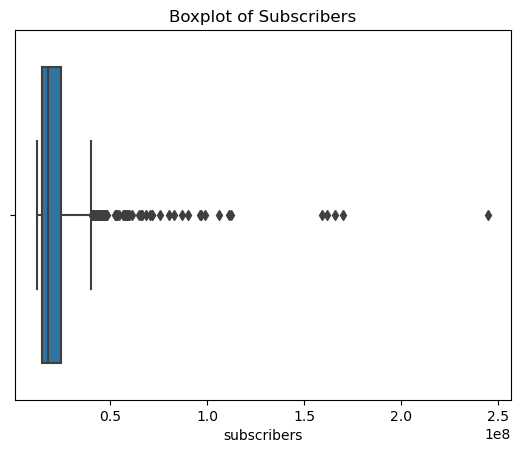

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Histogram for video views
sns.histplot(data['video views'], kde=True)
plt.title('Distribution of Video Views')
plt.show()

# Boxplot for subscribers
sns.boxplot(x=data['subscribers'])
plt.title('Boxplot of Subscribers')
plt.show()

/tmp/ipykernel_20/2741732197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


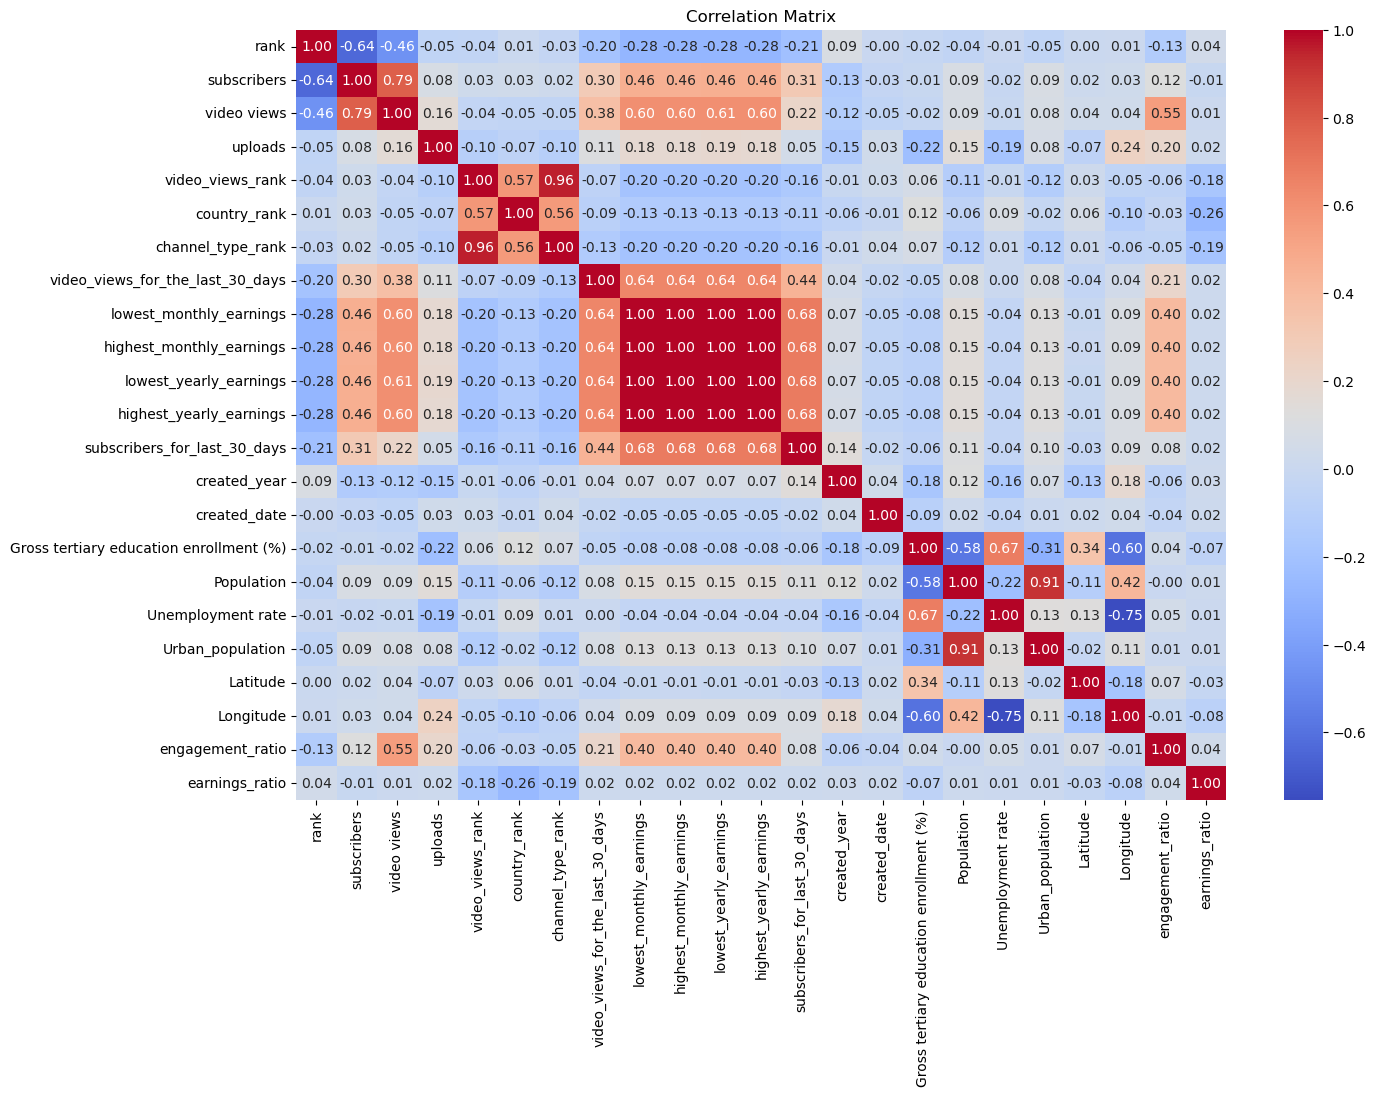

In [21]:
plt.figure(figsize=(15, 10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


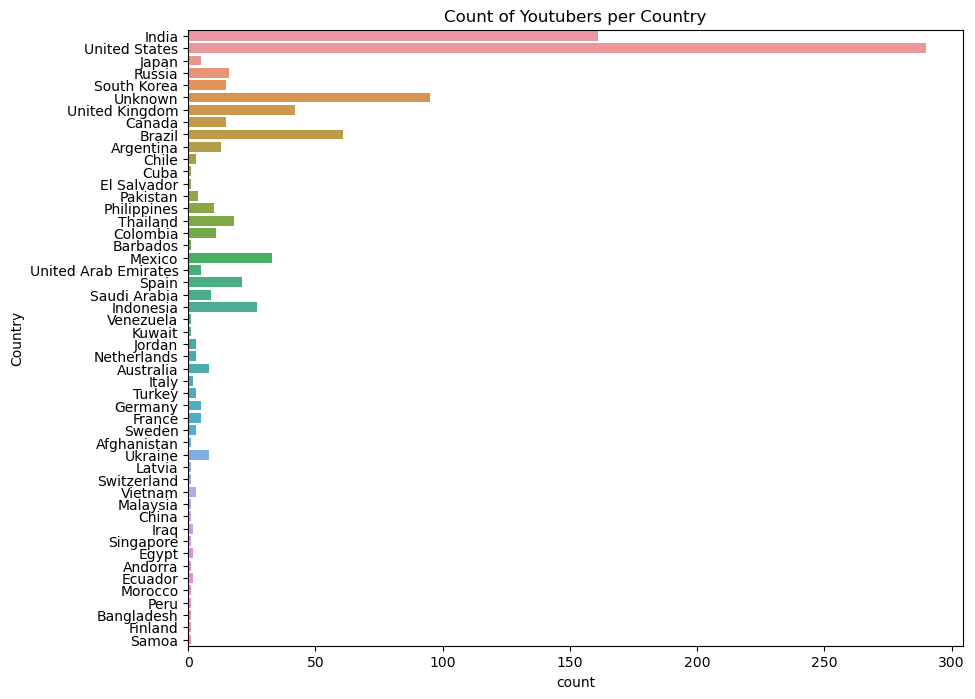

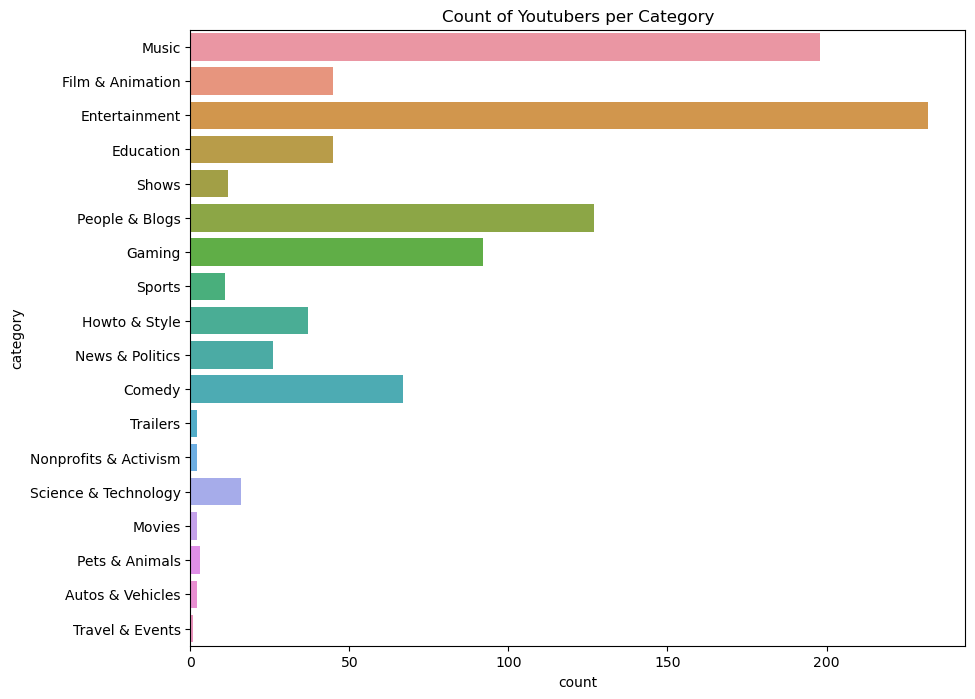

In [22]:
plt.figure(figsize=(10, 8))
sns.countplot(y=data['Country'])
plt.title('Count of Youtubers per Country')
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(y=data['category'])
plt.title('Count of Youtubers per Category')
plt.show()


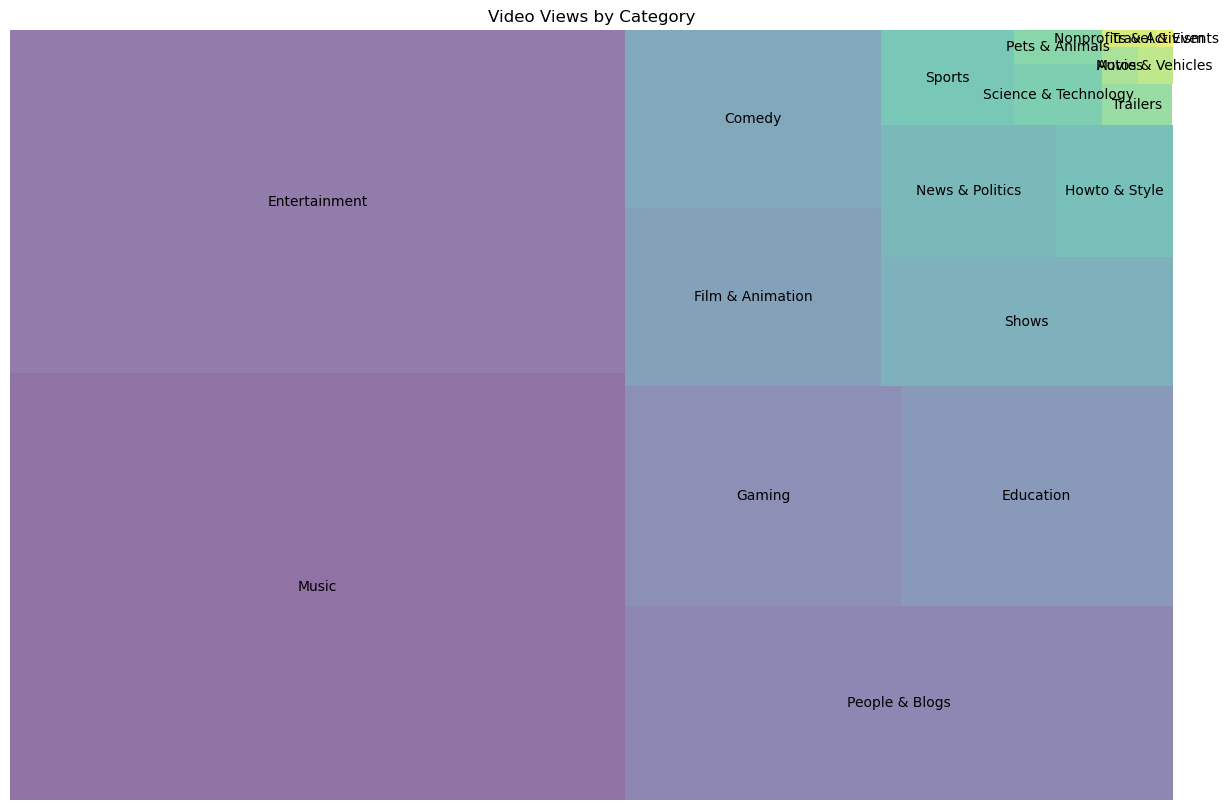

In [23]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'category' and sum the 'video views' for each category
grouped_data = data.groupby('category')['video views'].sum().reset_index()

# Sort the data in descending order
grouped_data = grouped_data.sort_values(by='video views', ascending=False)

plt.figure(figsize=(15, 10))
squarify.plot(sizes=grouped_data['video views'], label=grouped_data['category'], alpha=0.6, color=sns.color_palette("viridis", n_colors=len(grouped_data)))
plt.title('Video Views by Category')
plt.axis('off')
plt.show()



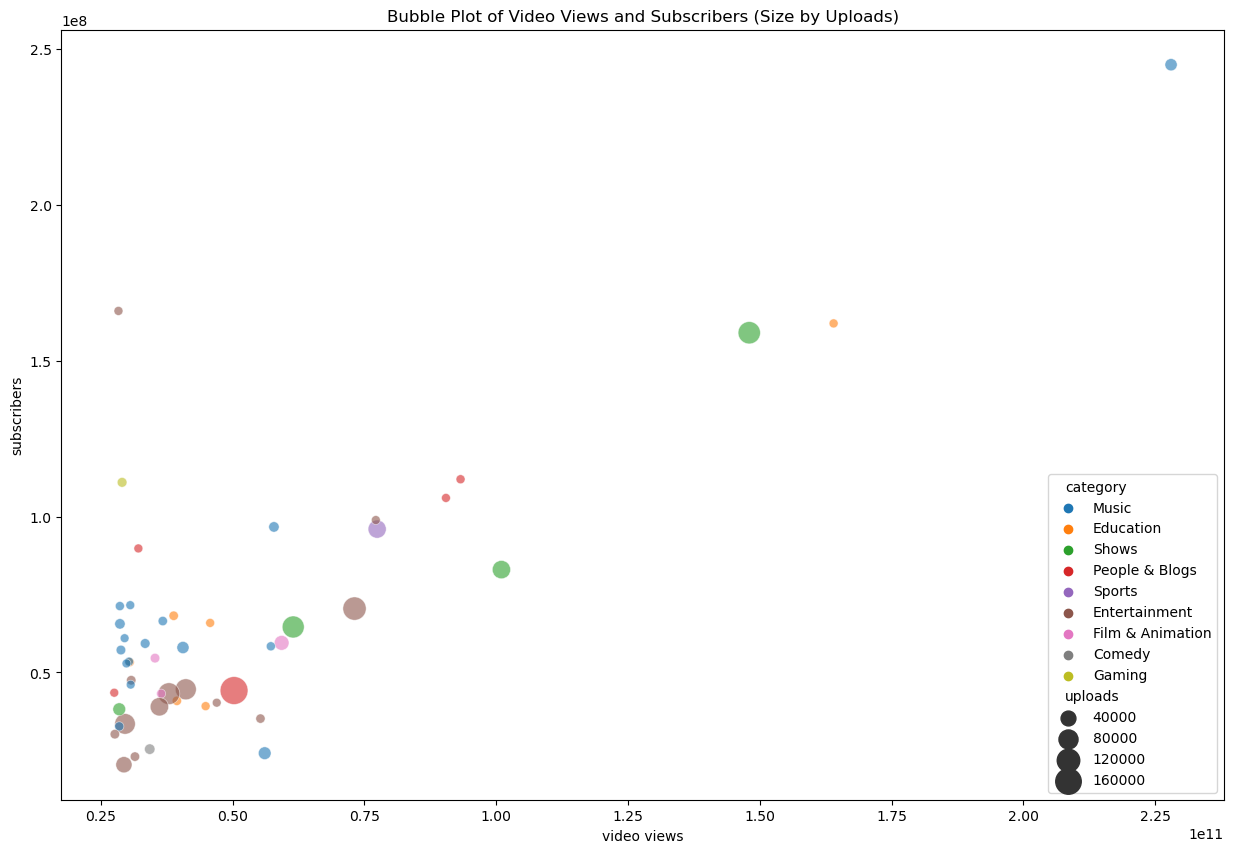

In [24]:
top_youtubers = data.nlargest(50, 'video views')  # Taking top 50 for clarity

plt.figure(figsize=(15, 10))
sns.scatterplot(data=top_youtubers, x='video views', y='subscribers', size='uploads', hue='category', sizes=(40, 400), alpha=0.6)
plt.title('Bubble Plot of Video Views and Subscribers (Size by Uploads)')
plt.show()


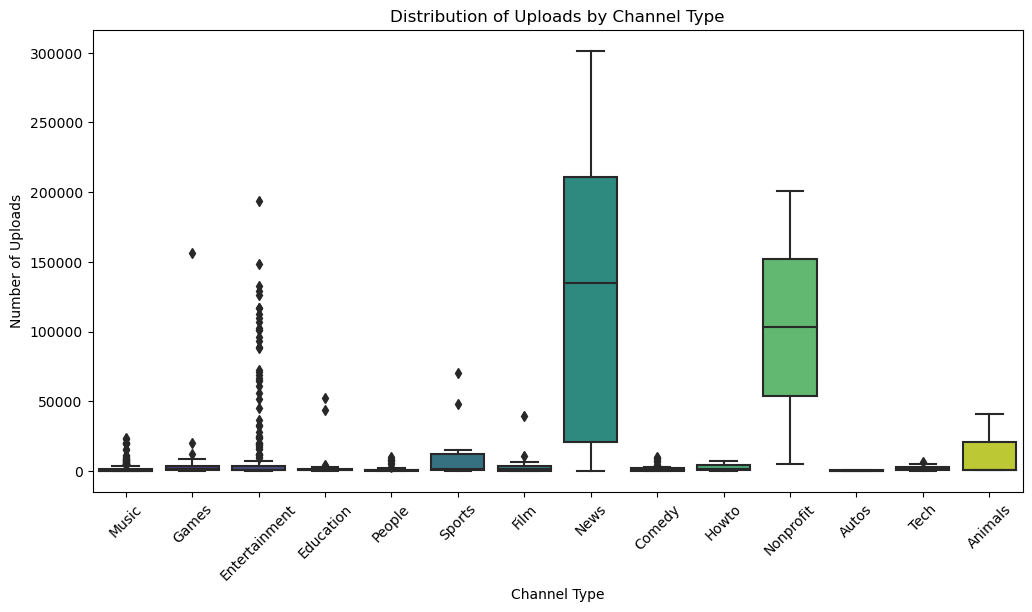

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='channel_type', y='uploads', palette='viridis')
plt.title('Distribution of Uploads by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Number of Uploads')
plt.xticks(rotation=45)
plt.show()

**Nature of Content:** The observations can reflect the nature of content in these categories:

* **Entertainment:** While many channels might upload consistently, some channels might rely on occasional viral content or have a different strategy, leading to them being outliers.
* **News:** Given the nature of news – which is event-driven – there might be more variability in uploads. Some channels might post multiple times a day based on current events, while others might have more periodic, in-depth analyses or features.
* **Non-profit:** These channels might have varying frequencies based on campaigns, awareness drives, or periodic updates about their work, leading to variability in their upload counts

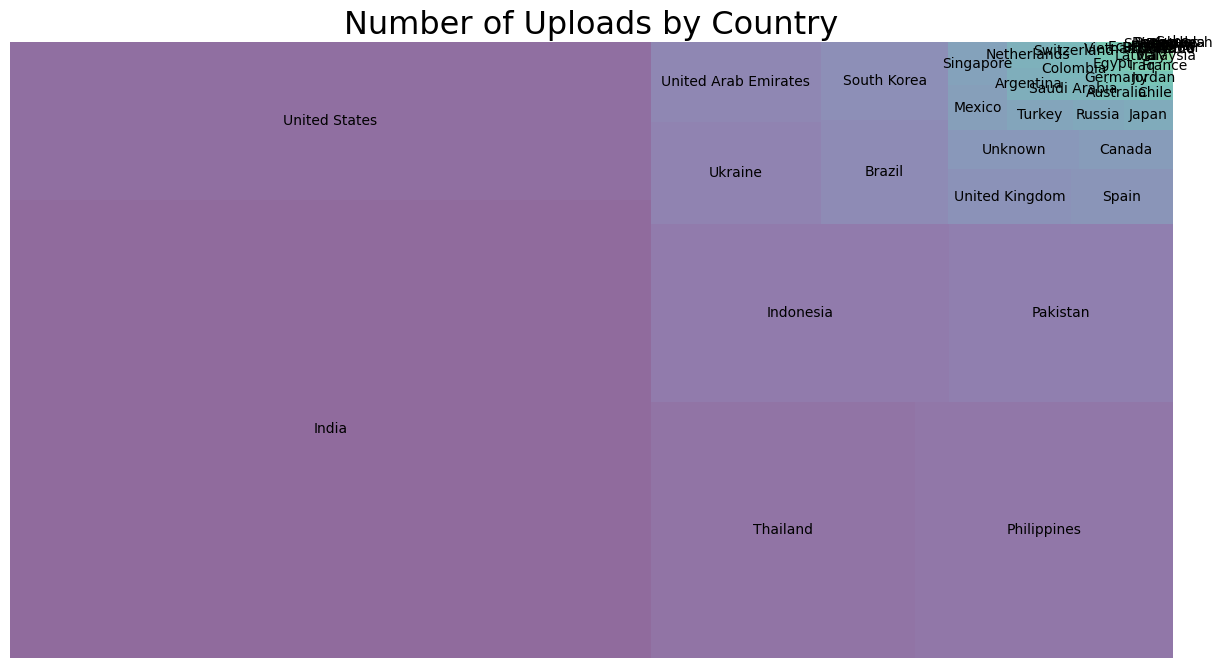

In [26]:
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where uploads is not positive
country_uploads = data[data['uploads'] > 0]

# Group data by country and sum the uploads
country_uploads = country_uploads.groupby('Country')['uploads'].sum().reset_index().sort_values(by='uploads', ascending=False)

# Plot
plt.figure(figsize=(15, 8))
squarify.plot(sizes=country_uploads['uploads'], 
              label=country_uploads['Country'], 
              alpha=0.6, 
              color=sns.color_palette("viridis", n_colors=len(country_uploads)))
plt.title('Number of Uploads by Country',fontsize=23)
plt.axis('off')
plt.show()

**Treemap:** The data was aggregated by the sum of uploads. This shows the total number of uploads for each country.

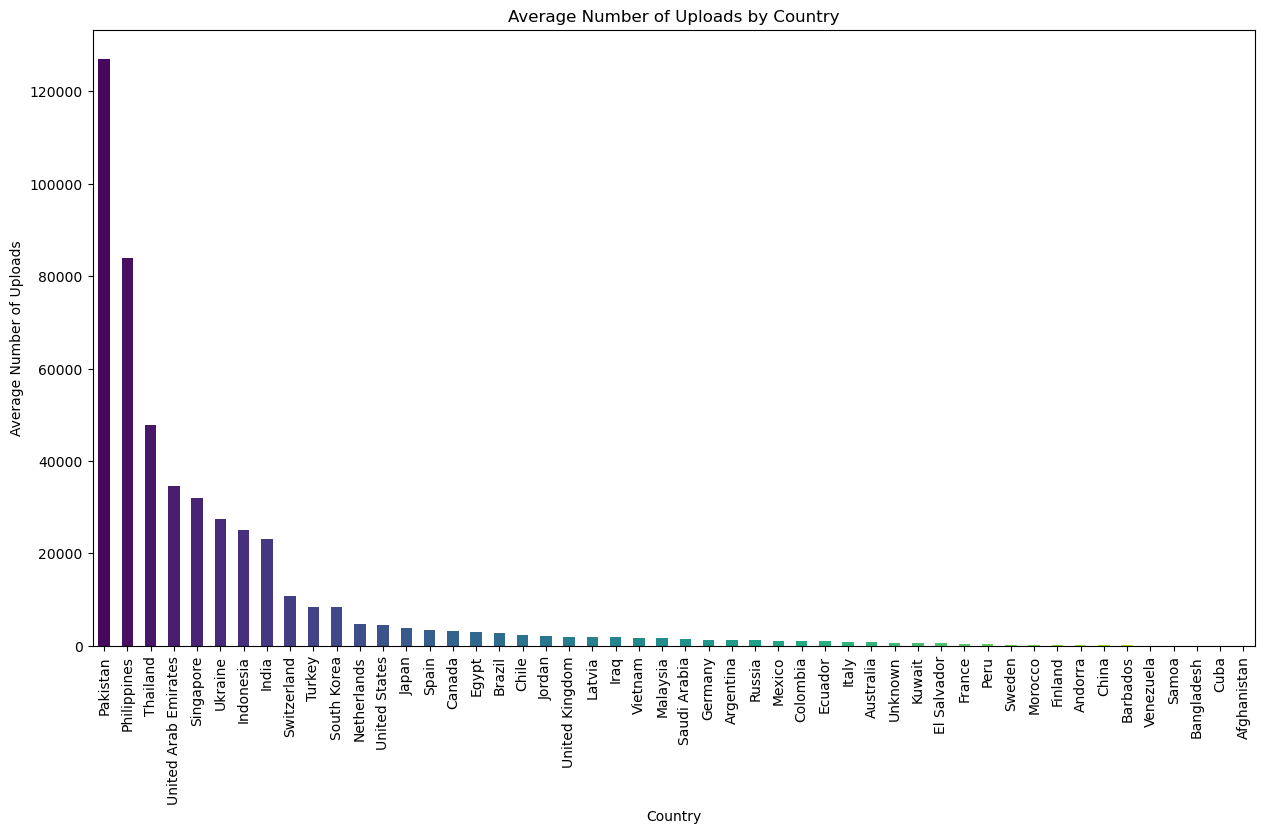

In [27]:
country_uploads = data.groupby('Country')['uploads'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
country_uploads.plot(kind='bar', color=sns.color_palette("viridis", n_colors=len(country_uploads)))
plt.title('Average Number of Uploads by Country')
plt.xlabel('Country')
plt.ylabel('Average Number of Uploads')
plt.xticks(rotation=90)
plt.show()

**Bar Chart:** The data was aggregated by the mean of uploads. This shows the average number of uploads per channel (or Youtuber) for each country.

* It's possible for a country to have a few channels with a very high number of uploads, which would make the sum high (as seen in the treemap for **India** and **USA**).
* On the other hand, if another country has consistently higher uploads across all its channels but no extreme outliers, its average could be higher (as seen in the bar chart for **Pakistan** and **Philippines**).

* If you want to know which country has the highest total uploads, look at the treemap.
* If you want to know which country's channels, on average, upload the most, look at the bar chart.

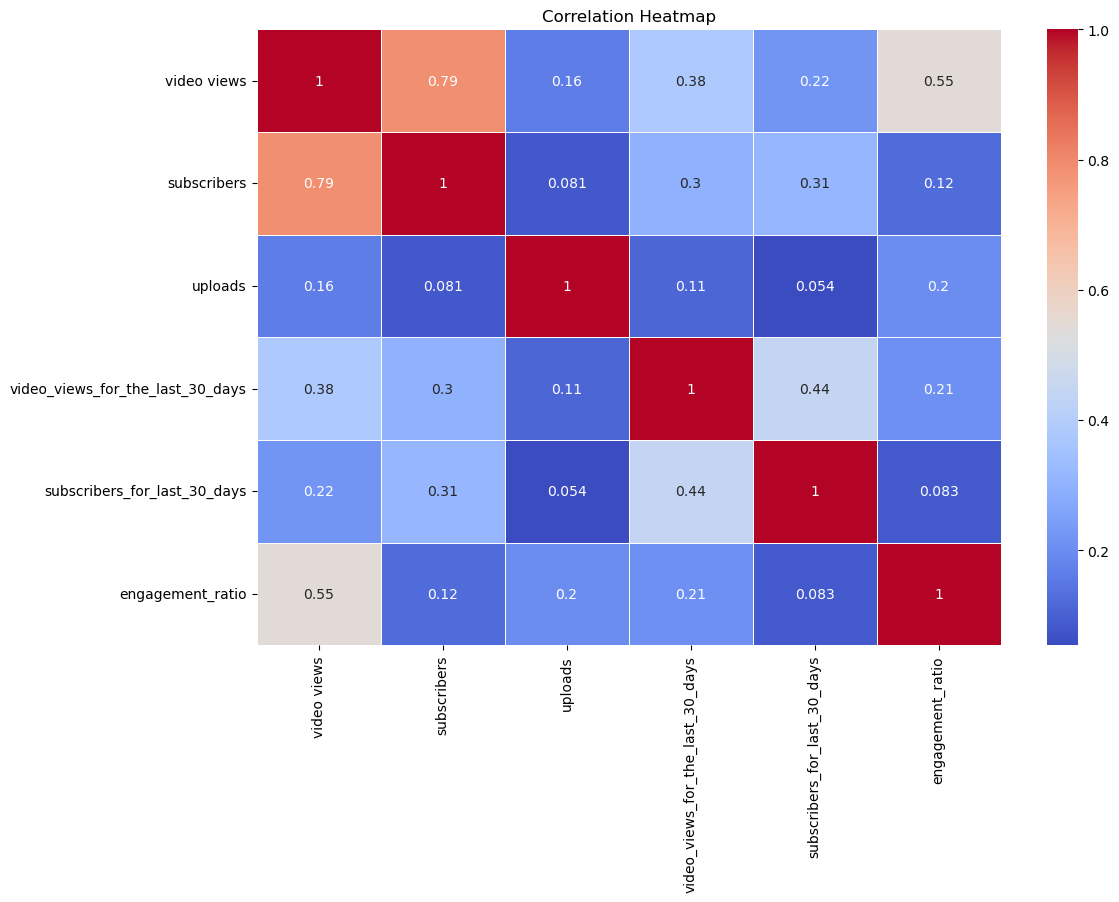

In [28]:
correlation_matrix = data[['video views', 'subscribers', 'uploads', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 'engagement_ratio']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


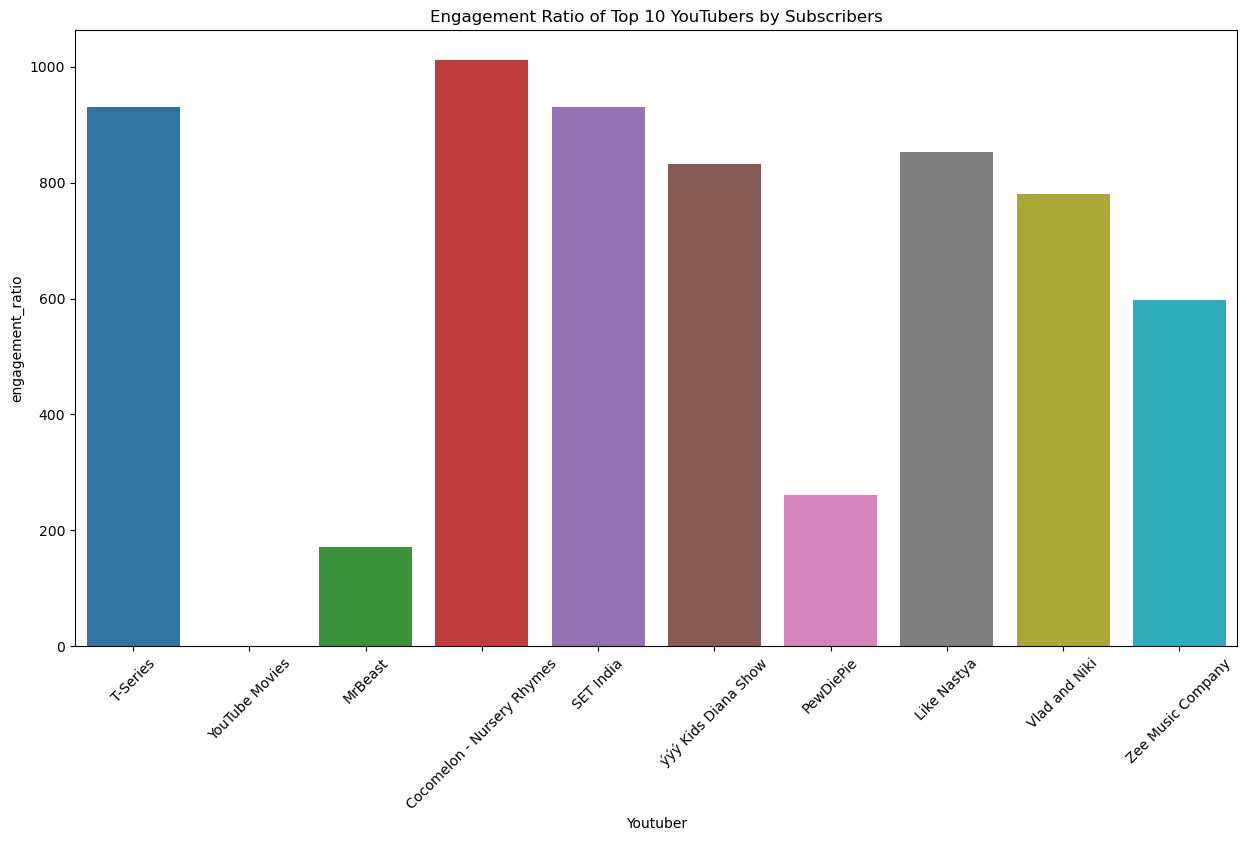

In [29]:
top_youtubers = data.sort_values(by='subscribers', ascending=False).head(10)
data = data[data['Youtuber'] != 'YouTube Movies']

plt.figure(figsize=(15, 8))
sns.barplot(x='Youtuber', y='engagement_ratio', data=top_youtubers)
plt.title('Engagement Ratio of Top 10 YouTubers by Subscribers')
plt.xticks(rotation=45)
plt.show()
# print(data.info())

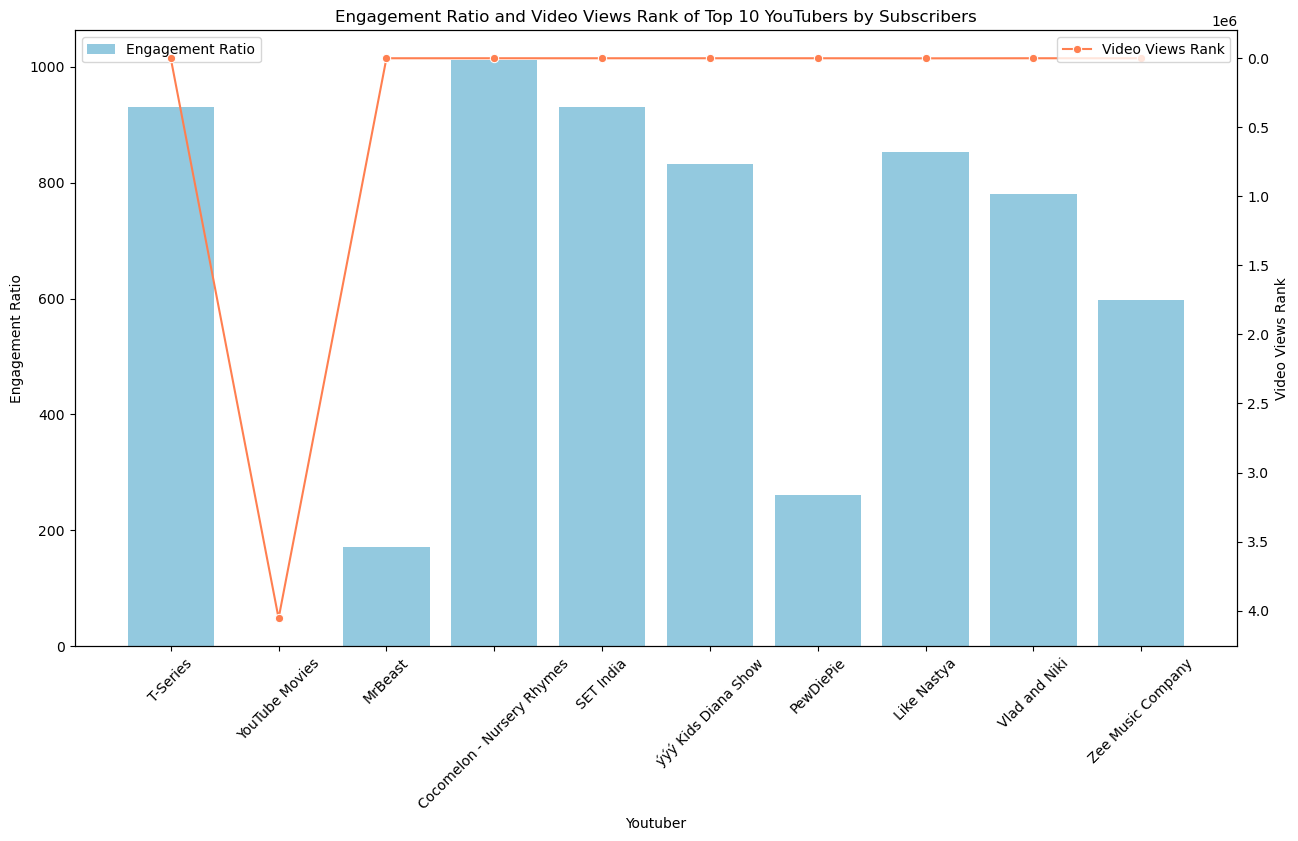

In [30]:
plt.figure(figsize=(15, 8))

# Plotting engagement_ratio on primary y-axis
ax1 = sns.barplot(x='Youtuber', y='engagement_ratio', data=top_youtubers, color='skyblue', label='Engagement Ratio')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting video_views_rank on secondary y-axis
sns.lineplot(x='Youtuber', y='video_views_rank', data=top_youtubers, ax=ax2, color='coral', marker='o', label='Video Views Rank')
ax2.invert_yaxis()  # This inverts the rank so that lower ranks (which are better) are at the top

# Setting the title and rotating x-axis labels
plt.title('Engagement Ratio and Video Views Rank of Top 10 YouTubers by Subscribers')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('Engagement Ratio')
ax2.set_ylabel('Video Views Rank')

# Displaying the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



plt.show()


In [31]:
current_year = 2023
top_youtubers['channel_age'] = current_year - top_youtubers['created_year']

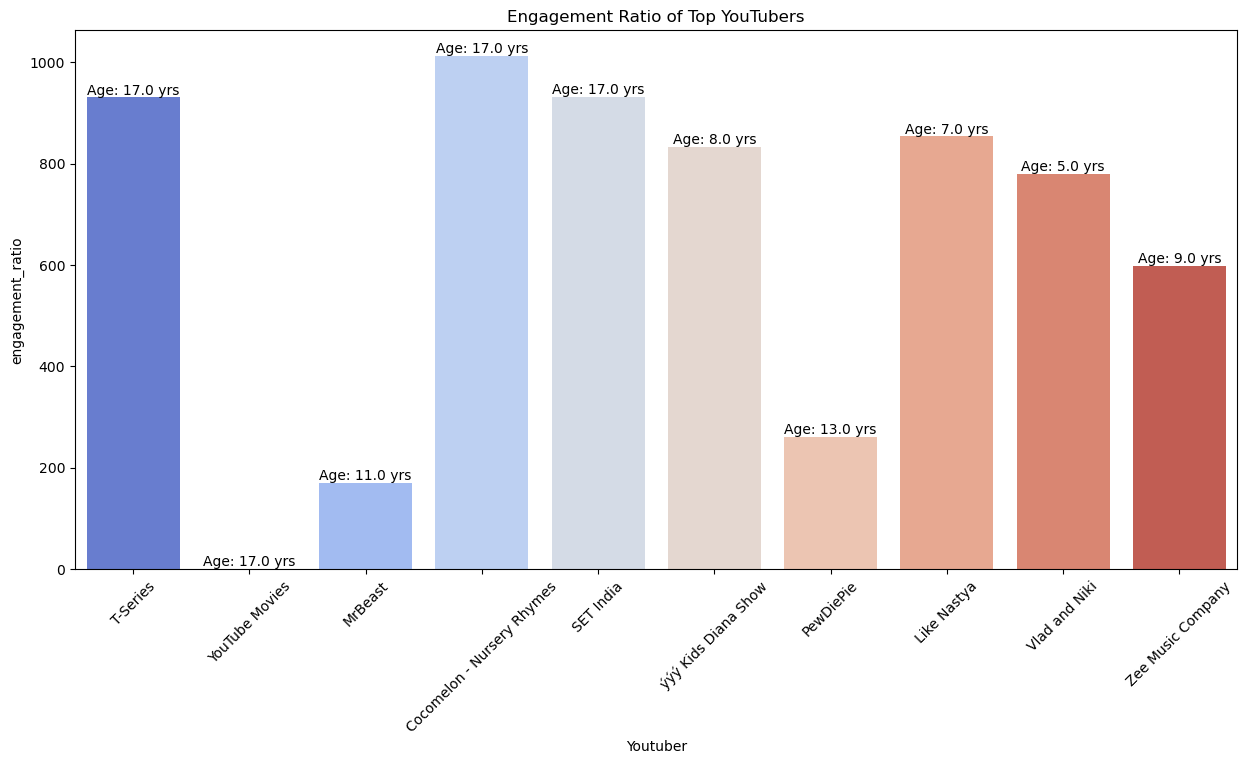

In [32]:
plt.figure(figsize=(15, 7))
sns_barplot = sns.barplot(x='Youtuber', y='engagement_ratio', data=top_youtubers, palette='coolwarm')
plt.title('Engagement Ratio of Top YouTubers')
plt.xticks(rotation=45)

# Get the channel ages to annotate the bars
channel_ages = top_youtubers['channel_age'].tolist()

# Annotating each bar with the channel age
for idx, p in enumerate(sns_barplot.patches):
    sns_barplot.annotate(f'Age: {channel_ages[idx]} yrs', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         fontsize=10, color='black', 
                         xytext=(0, 5), 
                         textcoords='offset points')

plt.show()


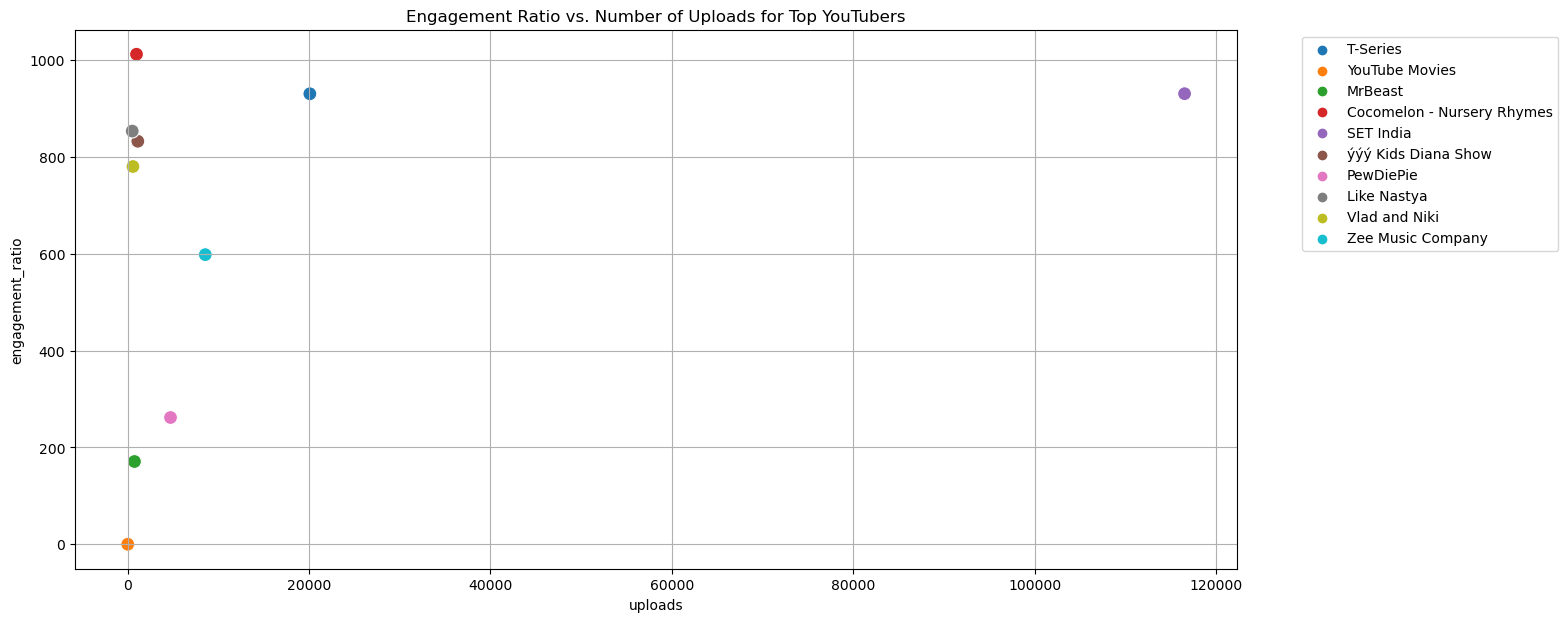

In [33]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='uploads', y='engagement_ratio', data=top_youtubers, hue='Youtuber', s=100)
plt.title('Engagement Ratio vs. Number of Uploads for Top YouTubers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

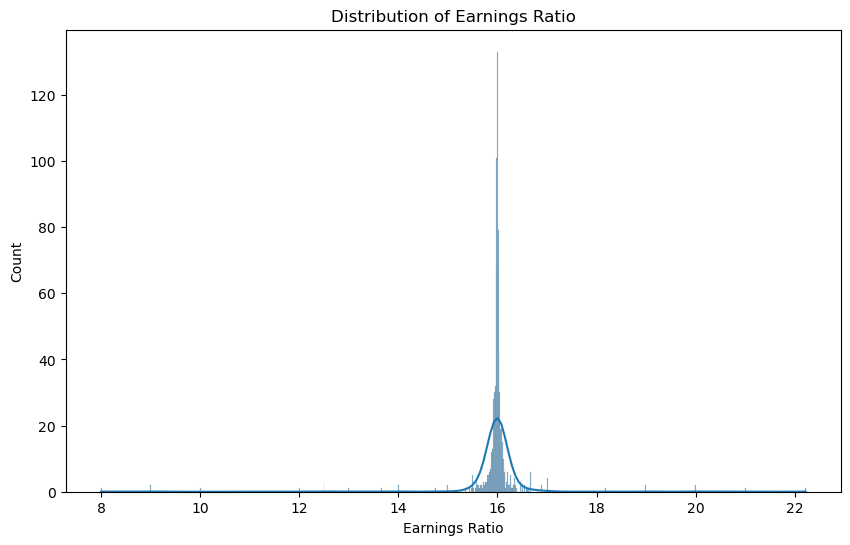

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data['earnings_ratio'], kde=True)
plt.title('Distribution of Earnings Ratio')
plt.xlabel('Earnings Ratio')
plt.show()

Lets see what does it looks like

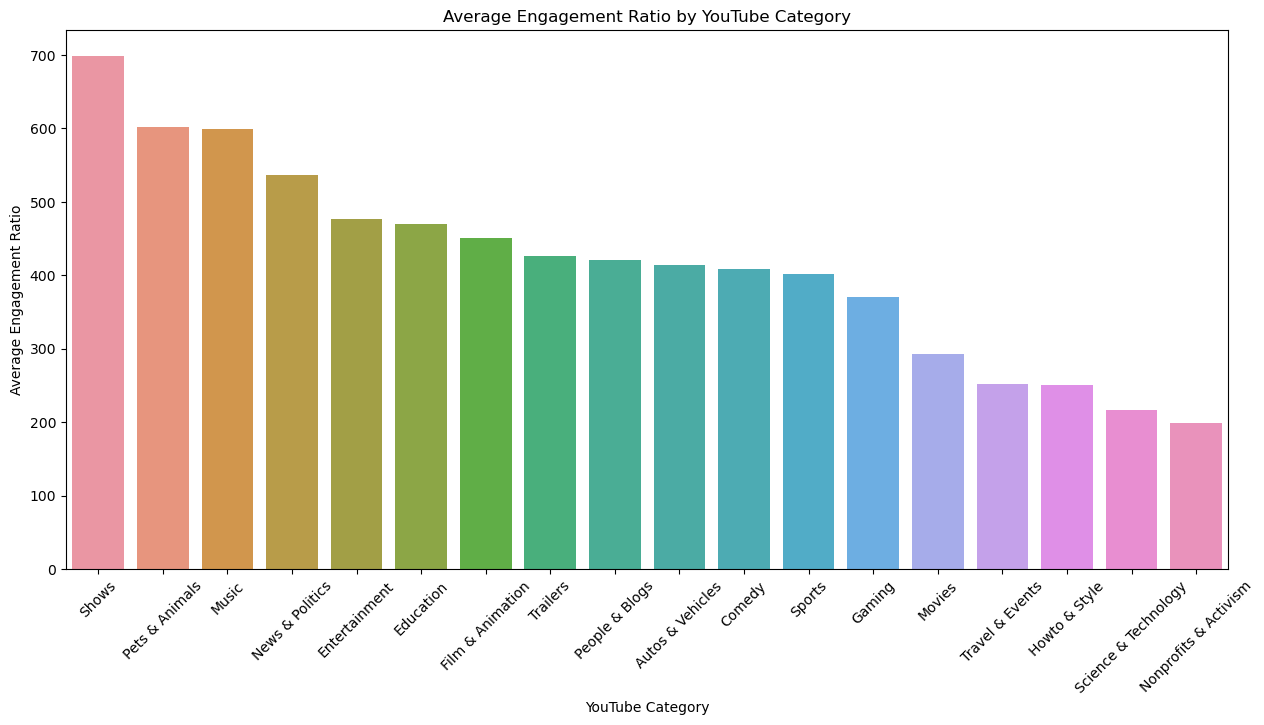

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'category' and get the mean engagement ratio for each category
category_engagement = data.groupby('category')['engagement_ratio'].mean().reset_index()

# Sort the categories by engagement ratio for better visualization
category_engagement = category_engagement.sort_values(by='engagement_ratio', ascending=False)

# Plot
plt.figure(figsize=(15, 7))
sns.barplot(x='category', y='engagement_ratio', data=category_engagement)
plt.title('Average Engagement Ratio by YouTube Category')
plt.xticks(rotation=45)
plt.ylabel('Average Engagement Ratio')
plt.xlabel('YouTube Category')
plt.show()


In [36]:
#code to save data to new file 
data.to_csv('updated_data.csv', index=False)